`checklist`
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

# Look at the big picture.
## Frame the Problem
-  How does the company expect to use and benefit from this model?
> A sequence of data processing components is called a data pipeline.
- The next question to ask is what the current solution looks like (if any).

## Select a Performance Measure
> For example, an RMSE equal to 50,000 means that about 68% of the system’s predictions fall within $50,000 of the actual value, and about 95% of the predictions fall within $100,000 of the actual value.5 Equation 2-1 shows the mathematical formula to compute the RMSE.

> When a feature has a bell-shaped normal distribution (also called a Gaussian distribution), which is very common, the “68-95-99.7” rule applies: about 68% of the values fall within 1σ of the mean, 95% within 2σ, and 99.7% within 3σ.

> 范数指数越高，则越关注大的价值，忽视小的价值。这就是为什么RMSE比MAE对异常值更敏感。但是当异常值非常稀少（例如钟形曲线）时，RMSE的表现优异，通常作为首选。

## Check the Assumptions

In [1]:
import numpy as np
import pandas as pd
import sklearn
import os

In [2]:
housing = pd.read_csv('datasets\\housing\\housing.csv')
housing.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11565,-117.98,33.75,27.0,2343.0,415.0,1537.0,426.0,5.1345,210600.0,<1H OCEAN
2101,-119.76,36.74,52.0,2137.0,448.0,1194.0,444.0,1.3029,69100.0,INLAND
12264,-116.87,33.76,5.0,4116.0,761.0,1714.0,717.0,2.5612,130800.0,INLAND
11373,-117.97,33.68,23.0,1722.0,316.0,865.0,309.0,4.6452,273800.0,<1H OCEAN
5462,-118.47,33.99,41.0,1146.0,310.0,833.0,270.0,2.5938,285000.0,<1H OCEAN


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12FD0E50>,
      dtype=object)

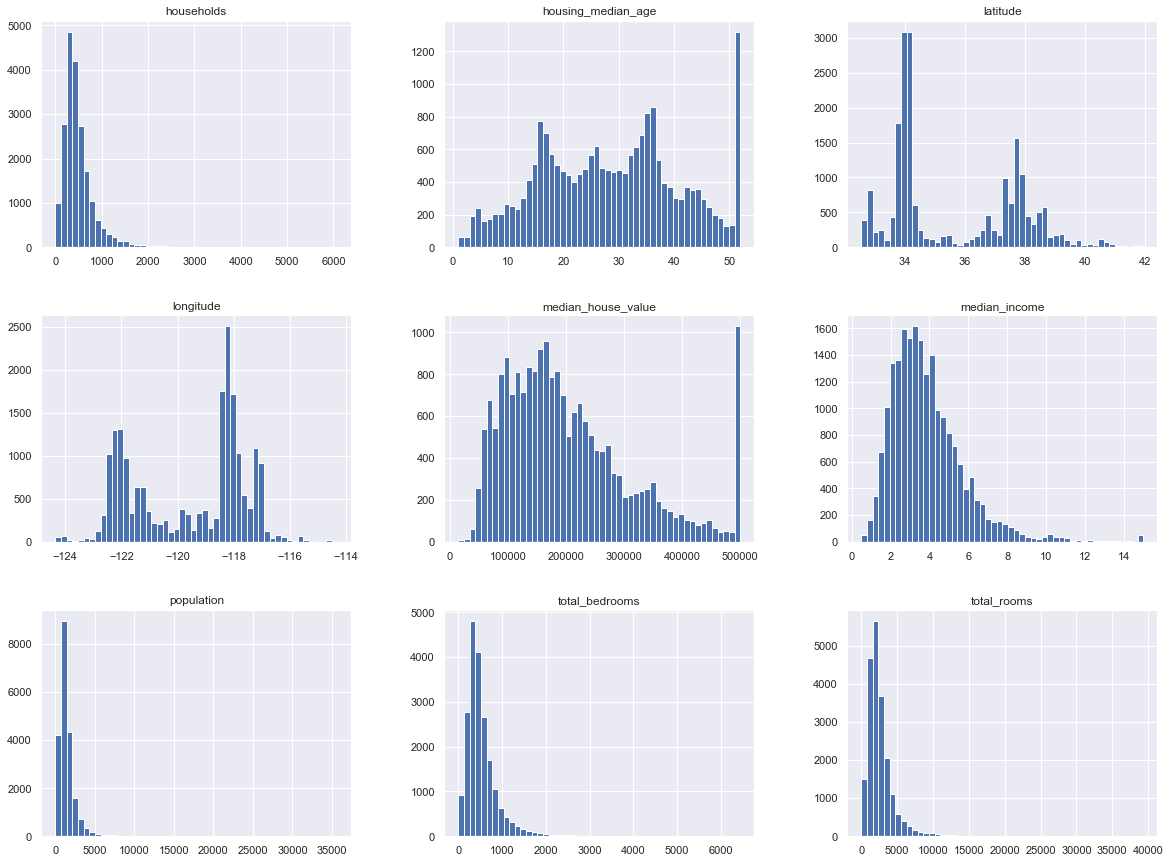

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
housing.hist(bins=50,figsize=(20,15))

`data snooping bias`
if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model.

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

🙋 
> When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone booth. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is composed of 51.3% female and 48.7% male, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population. If they used purely random sampling, there would be about **12%** chance of sampling a skewed test set with either less than 49% female or more than 54% female.

(array([ 736., 3762., 5185., 4505., 2923., 1660.,  815.,  458.,  215.,
         110.,  124.,   37.,   32.,   21.,   57.]),
 array([ 0.4999 ,  1.46658,  2.43326,  3.39994,  4.36662,  5.3333 ,
         6.29998,  7.26666,  8.23334,  9.20002, 10.1667 , 11.13338,
        12.10006, 13.06674, 14.03342, 15.0001 ]),
 <a list of 15 Patch objects>)

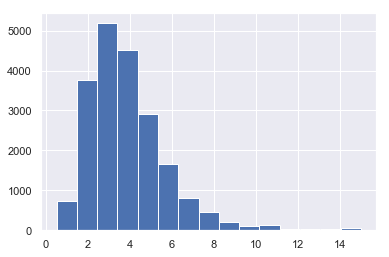

In [8]:
plt.hist(housing['median_income'],bins=15)

In [9]:
housing['income_cat'] = np.ceil(housing["median_income"]/1.5)
housing['income_cat'].where(housing["income_cat"]<5,5.0,inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,random_state=42,test_size=0.2)

for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Text(0.5,1,'Test Set')

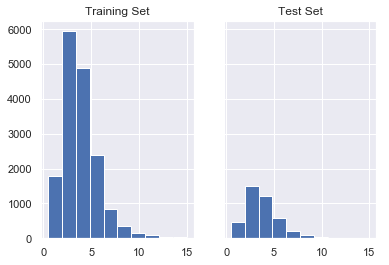

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.hist(strat_train_set['median_income'])
ax1.set_title('Training Set')
ax2.hist(strat_test_set['median_income'])
ax2.set_title('Test Set')

In [12]:
for set in(strat_test_set,strat_train_set):
    set.drop(["income_cat"],axis=1,inplace=True)

# Get the data
# Discover and Visualize the Data to Gain Insights

In [13]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

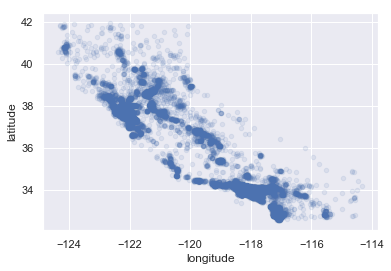

In [18]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

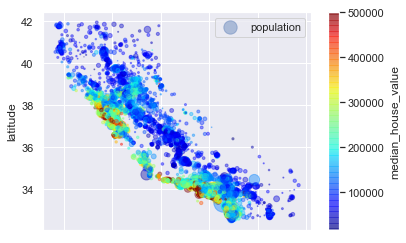

In [20]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100,label="population",
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

## Looking for correlations

In [24]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

d:\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0559A9F0>,
      dtype=object)

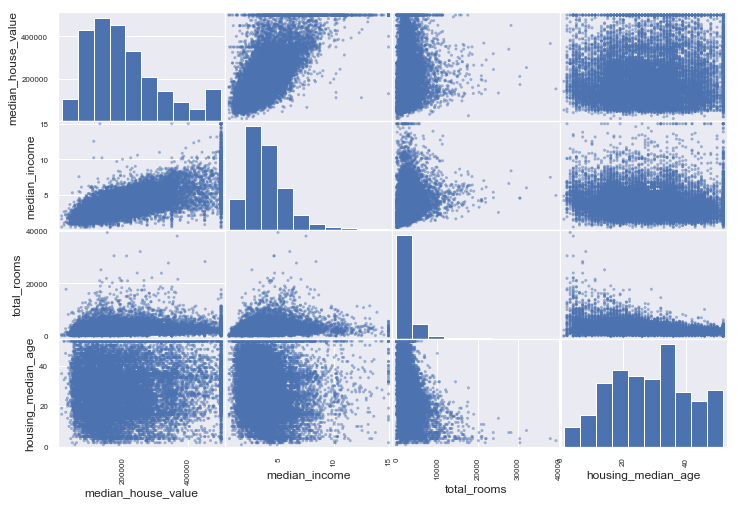

In [25]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

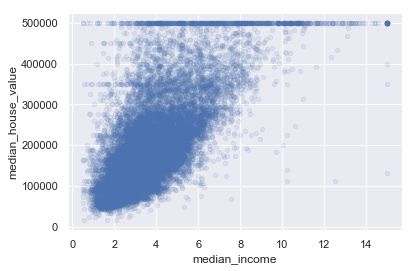

In [26]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

## Experimenting with Attribute Combinations